In [285]:
import pandas as pd

In [286]:
file = './DWM/T3.docx'

In [287]:
ms = pd.read_csv('./DWM/DWM_Marks_T3.csv', skip_blank_lines=True)

In [288]:
ms.head()

,SN.,Roll No.,Student Name,Q1,Q2,Q3,Q4,Total,CO3,CO4,CO5,CO6
0,1,14103104,Ojas Singh Thakur,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,0.00
1,2,16103003,Prakhar Saxena,3.0,5.5,1.5,2.5,12.5,41.7,0.0,55.0,32.14
2,3,16103004,Neha Rastogi,7.5,7.0,4.5,6.0,25,83.3,20.0,70.0,85.71
3,4,16103006,Tarushi Agrawal,8.0,7.0,5.0,6.0,26,66.7,40.0,70.0,92.86
4,5,16103007,Kanishk,5.0,6.0,1.0,0.5,12.5,8.3,0.0,60.0,42.86


In [289]:
ms = ms[ms["Total"] != 'A']
ms = ms.drop(["SN."], axis=1)

In [290]:
ms.head()

,Roll No.,Student Name,Q1,Q2,Q3,Q4,Total,CO3,CO4,CO5,CO6
1,16103003,Prakhar Saxena,3.0,5.5,1.5,2.5,12.5,41.7,0.0,55.0,32.14
2,16103004,Neha Rastogi,7.5,7.0,4.5,6.0,25,83.3,20.0,70.0,85.71
3,16103006,Tarushi Agrawal,8.0,7.0,5.0,6.0,26,66.7,40.0,70.0,92.86
4,16103007,Kanishk,5.0,6.0,1.0,0.5,12.5,8.3,0.0,60.0,42.86
5,16103008,Rishabh Jaiswal,8.0,5.0,1.0,7.0,21,33.3,100.0,50.0,64.29


In [291]:
q_topic = pd.read_csv("ques_topics.csv")
q_topic

,Question Number,Topic,Cosine Similarity
0,Q1,item-to-item recommendation,0.866025
1,Q2,apriori algorithm,1.000000
2,Q3,random,0.707107
3,Q4,: dbscan,0.707107


In [292]:
from ques_paper_to_dic import get_ques_marks

marks = get_ques_marks(file)
q_topic['Marks'] = marks

In [293]:
q_topic

,Question Number,Topic,Cosine Similarity,Marks
0,Q1,item-to-item recommendation,0.866025,8
1,Q2,apriori algorithm,1.000000,10
2,Q3,random,0.707107,6
3,Q4,: dbscan,0.707107,11


In [294]:
import matplotlib.pyplot as plt
import numpy as np

### Student Dashboard

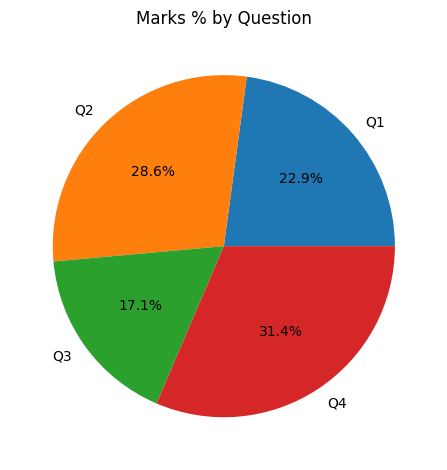

In [295]:
y = q_topic['Marks']
mylabels = q_topic['Question Number']
fig, ax = plt.subplots()
ax.pie(y, labels=mylabels, autopct='%.1f%%')
ax.set_title('Marks % by Question')
plt.tight_layout()

In [296]:
mean_q = list(ms.mean())
mean_q = mean_q[1 : 1+len(marks)]
mean_q

/var/folders/71/m7vk6ll143bfrk27k51drl380000gn/T/ipykernel_17982/2974602714.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_q = list(ms.mean())


[5.903141361256544, 7.683246073298429, 3.5287958115183247, 4.049738219895288]

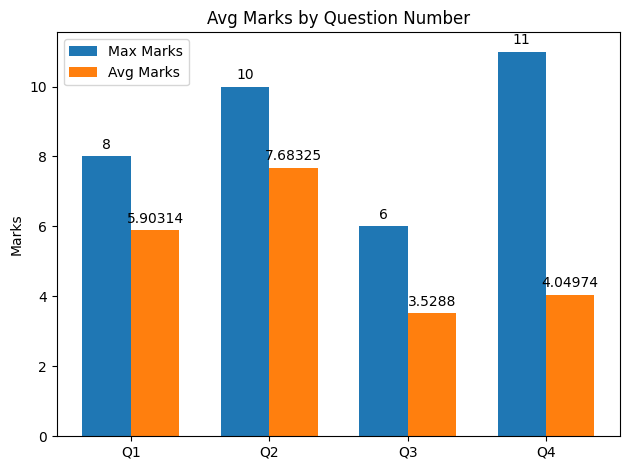

In [297]:
labels = q_topic['Question Number']
max_marks = q_topic['Marks']
avg_marks = np.array(mean_q)

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, max_marks, width, label='Max Marks')
rects2 = ax.bar(x + width/2, avg_marks, width, label='Avg Marks')

ax.set_ylabel('Marks')
ax.set_title('Avg Marks by Question Number')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

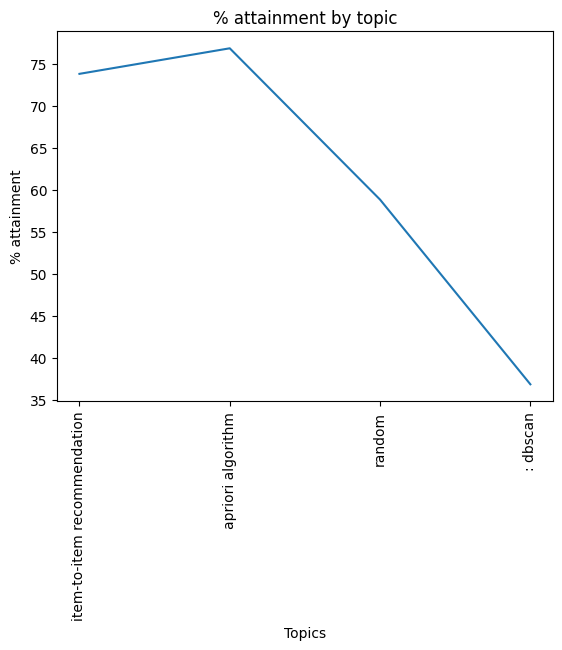

In [298]:
per_marks = (avg_marks/max_marks)*100.0
topics = q_topic['Topic']
plt.plot(topics, per_marks)
plt.xticks(rotation = 90)
plt.xlabel("Topics")
plt.ylabel("% attainment")
plt.title("% attainment by topic")
plt.show()

In [299]:
marks_obtained = ms.iloc[ : , 2:2+len(marks)]
marks_obtained

,Q1,Q2,Q3,Q4
1,3.0,5.5,1.5,2.5
2,7.5,7.0,4.5,6.0
3,8.0,7.0,5.0,6.0
4,5.0,6.0,1.0,0.5
5,8.0,5.0,1.0,7.0
...,...,...,...,...
187,6.5,8.0,2.0,3.5
188,3.5,6.0,4.0,1.5
189,4.5,7.0,5.0,3.0
190,3.0,6.0,3.5,1.0


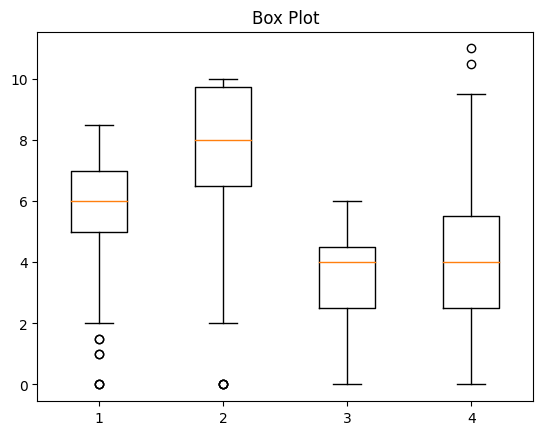

In [300]:
plt.boxplot(marks_obtained)
plt.title("Box Plot")
plt.show()

In [301]:
def stu_attainment(enroll):
    details =  ms.loc[ms['Roll No.'] == enroll]
    stu_marks = np.array(details.iloc[:, 2:2+len(marks)])
    max_marks = np.array(q_topic['Marks'])
    per_attainment = (stu_marks/max_marks)*100.0
    per_attainment = per_attainment.reshape(4)
    return per_attainment

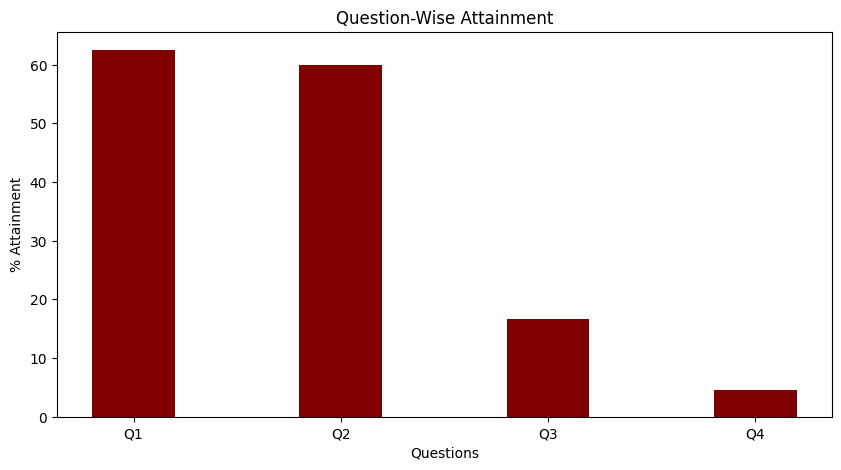

In [302]:
ques_num = q_topic['Question Number']
per_attainment = stu_attainment(16103007)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ques_num, per_attainment , color ='maroon',
        width = 0.4)

plt.xlabel("Questions")
plt.ylabel("% Attainment")
plt.title("Question-Wise Attainment")
plt.show()

In [303]:
def get_weak_topics(enroll):
    per_attainment = stu_attainment(enroll)
    topics = q_topic['Topic']
    ls = []
    for i in range(0,len(per_attainment)):
        if per_attainment[i] < 60.0:
            ls.append(topics[i])
    return ls

In [304]:
get_weak_topics(16103007)

['random', ': dbscan']

### Teacher's Dashboard 

In [305]:
max_marks = q_topic['Marks']
avg_marks = np.array(mean_q)
per_marks = (avg_marks/max_marks)*100.0

weak_topics_teacher=[]

topics = q_topic['Topic']
for i in range(0,len(per_marks)):
    if per_marks[i] < 60.0:
        weak_topics_teacher.append(topics[i])

weak_topics_teacher

['random', ': dbscan']

In [306]:
def get_attainment_column(col, max_marks):
    att_col = []
    for i in col:
        att_col.append((i/max_marks)*100.0)
    return att_col

In [307]:
new_df = pd.DataFrame()
new_df['Roll No'] = ms['Roll No.']
new_df['Student Name'] = ms['Student Name']
for name, values in marks_obtained.iteritems():
    max_marks = int(q_topic.loc[q_topic['Question Number'] == name]['Marks'])
    att_col = get_attainment_column(list(values), max_marks)
    new_df[name] = att_col
new_df

/var/folders/71/m7vk6ll143bfrk27k51drl380000gn/T/ipykernel_17982/1540268601.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in marks_obtained.iteritems():


,Roll No,Student Name,Q1,Q2,Q3,Q4
1,16103003,Prakhar Saxena,37.50,55.0,25.000000,22.727273
2,16103004,Neha Rastogi,93.75,70.0,75.000000,54.545455
3,16103006,Tarushi Agrawal,100.00,70.0,83.333333,54.545455
4,16103007,Kanishk,62.50,60.0,16.666667,4.545455
5,16103008,Rishabh Jaiswal,100.00,50.0,16.666667,63.636364
...,...,...,...,...,...,...
187,16803002,Nikita Gupta,81.25,80.0,33.333333,31.818182
188,16803003,Kirti Godani,43.75,60.0,66.666667,13.636364
189,16803021,Deepshi Sharma,56.25,70.0,83.333333,27.272727
190,16803025,Prakhar Vaish,37.50,60.0,58.333333,9.090909


In [308]:
strong_avg_weak = np.zeros((len(marks),3))
for index, row in new_df.iterrows():
    row = row[2:]
    for i in range(0, len(row)):
        if row[i] >= 70:
            strong_avg_weak[i][0]+=1
        elif row[i] >= 50:
            strong_avg_weak[i][1]+=1
        else:
            strong_avg_weak[i][2]+=1
strong_avg_weak

array([[112.,  56.,  23.],
       [142.,  35.,  14.],
       [ 75.,  56.,  60.],
       [ 10.,  42., 139.]])

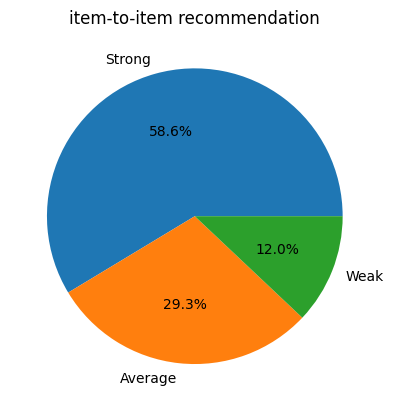

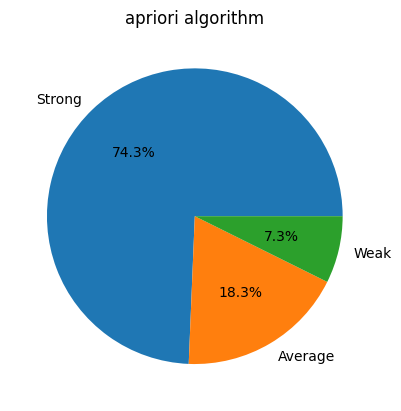

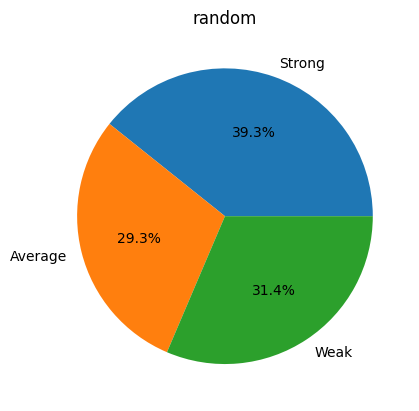

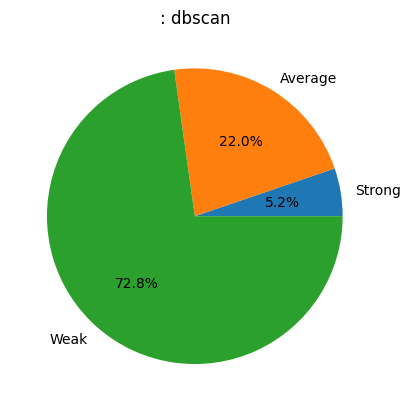

In [309]:
topics = q_topic['Topic']
for i in range(0, len(strong_avg_weak)):
    plt.pie(strong_avg_weak[i], labels = ['Strong', 'Average', 'Weak'], autopct='%.1f%%')
    plt.title(topics[i])
    plt.show()

In [313]:
ans=q_topic.loc[q_topic['Marks'].idxmax()]
ans['Topic']

': dbscan'

### Table for overall analysis

In [278]:
q_topic['Average Number'] = mean_q
q_topic

,Question Number,Topic,Cosine Similarity,Marks,Average Number
0,Q1,item-to-item recommendation,0.866025,8,5.903141
1,Q2,apriori algorithm,1.000000,10,7.683246
2,Q3,random,0.707107,6,3.528796
3,Q4,: dbscan,0.707107,11,4.049738


In [279]:
percentage_attainment = (q_topic['Average Number']/q_topic['Marks'])*100.0
q_topic['Percentage Attainment'] = percentage_attainment

In [280]:
q_topic

,Question Number,Topic,Cosine Similarity,Marks,Average Number,Percentage Attainment
0,Q1,item-to-item recommendation,0.866025,8,5.903141,73.789267
1,Q2,apriori algorithm,1.000000,10,7.683246,76.832461
2,Q3,random,0.707107,6,3.528796,58.813264
3,Q4,: dbscan,0.707107,11,4.049738,36.815802


In [281]:
from course_des_invert import get_inverted

cd = get_inverted()

In [282]:
module = []
for i in q_topic['Topic']:
    module.append(cd[i])

q_topic['Module'] = module

In [283]:
q_topic

,Question Number,Topic,Cosine Similarity,Marks,Average Number,Percentage Attainment,Module
0,Q1,item-to-item recommendation,0.866025,8,5.903141,73.789267,Recommendation Algorithms
1,Q2,apriori algorithm,1.000000,10,7.683246,76.832461,Association Algorithms
2,Q3,random,0.707107,6,3.528796,58.813264,Web caching Algorithm
3,Q4,: dbscan,0.707107,11,4.049738,36.815802,Clustering Algorithms


In [284]:
q_topic.to_csv('summary_t3.csv', index=False)